<a href="https://colab.research.google.com/github/aayam07/Reinforcement-Learning-Algorithms/blob/main/Copy_of_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [20]:
import random
N = 200  # total no of users we successively show the ads
d = 10  # no of ads. asumption (each of our ad has a fixed conversion rate)
ads_selected = []
numbers_of_rewards_1 = [0] * d  # number of times each ad i got reward 1 upto round n as an array
numbers_of_rewards_0 = [0] * d  # number of times each ad i got reward 1 upto round n as an array
total_reward = 0
for n in range(0, N):
  ad = 0  # index for the current ad (only initializing)
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad] # from our dataset (i.e. the simulation)
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward


In [13]:
print(ads_selected)

[2, 4, 7, 9, 1, 6, 3, 8, 3, 1, 5, 4, 5, 0, 9, 0, 2, 8, 3, 4, 3, 6, 4, 0, 7, 9, 7, 1, 7, 7, 7, 5, 1, 2, 7, 7, 7, 7, 6, 1, 7, 7, 3, 4, 1, 8, 9, 7, 7, 8, 2, 7, 7, 7, 7, 0, 0, 4, 5, 3, 7, 4, 1, 3, 0, 7, 6, 7, 4, 6, 1, 0, 7, 3, 6, 6, 5, 2, 5, 9, 4, 8, 2, 7, 1, 1, 3, 8, 1, 7, 7, 0, 1, 7, 5, 0, 3, 8, 1, 9]


## Visualising the results - Histogram

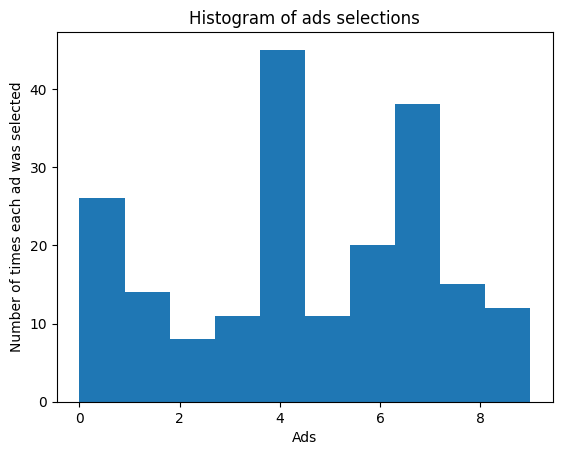

In [21]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()